# 미니프로젝트 4기 전혜민 : Pandas로 국민청원 데이터 분석하기

##1. 데이터 불러오기

In [169]:
import pandas as pd
import numpy as np
import datetime as dt

In [170]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [171]:
df.shape

(395547, 8)

In [172]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [173]:
df.tail(5)

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [174]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [176]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

In [177]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

In [178]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [179]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


##2. EDA

In [180]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape
#답변대상청원 분야별 개수

(80, 8)

In [181]:
df_20.category.value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
외교/통일/국방        4
반려동물            4
교통/건축/국토        3
육아/교육           3
보건복지            3
성장동력            2
경제민주화           2
미래              1
행정              1
Name: category, dtype: int64

In [182]:
df_20[['title', 'content']].head(3)

,title,content
1752,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
10894,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
18111,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...


In [183]:
df_20_loc = df.loc[df.votes > 200000]
df_20_loc.sort_values(by='votes', ascending=False).head()
#답변대상청원 중 득표 많은 순

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...


In [184]:
df['answer'] = (df['votes'] > 200000) == 1
#답변대상청원 칼럼 만들기

In [185]:
df.shape
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                  bool
dtype: object

In [186]:
df['answer'] = df['answer'].astype('int')

In [187]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()
#답변되지 않은 답변대상청원 개수

51

In [188]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5)
#답변대상청원 중 최다득표 청원

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,1
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0


In [189]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category
#최다 접수 분야

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


In [190]:
start_df = pd.DataFrame(df['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()
#최다접수 일자

청원 집계: 535일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [191]:
df_unique = pd.pivot_table(df, index=['category'], aggfunc=np.sum)
df_best = df_unique.sort_values(by='votes', \
                                              ascending=False).reset_index()
df_best
#전체청원중 총득표 가장 큰 분야 (답변대상 외 청원 포함)

,category,answer,answer_diff,answered,article_id,votes
0,인권/성평등,24,15,9,7963154504,12559348
1,안전/환경,10,8,2,7529327085,6605175
2,정치개혁,8,6,2,14675522264,6205013
3,기타,8,7,1,12225143856,5190468
4,육아/교육,3,2,1,5822857976,4475297
5,보건복지,3,1,2,6589637853,4341211
6,문화/예술/체육/언론,7,3,4,4427495546,4149796
7,외교/통일/국방,4,3,1,6869752323,3696112
8,교통/건축/국토,3,1,2,8551310963,2902330
9,반려동물,4,4,0,1033826398,2066624


In [192]:
df_start = pd.pivot_table(df, index=['start'], aggfunc=np.sum)
votes_df = df_start.sort_values(by='votes', ascending=False)
votes_df.loc[df_start['votes'] > 350000]
#투표 가장 많이 받은 일자

,answer,answer_diff,answered,article_id,votes
start,,,,,
2018-10-17,1,1,0,378900198,1300523
2018-10-31,2,2,0,430964099,827096
2018-06-13,1,1,0,146187973,786157
2018-10-18,2,2,0,423557789,721524
2018-02-19,1,0,1,99332898,701520
2018-11-09,2,2,0,349439392,672819
2018-07-22,1,1,0,282639463,672491
2017-09-06,1,0,1,22268570,648209
2018-06-24,2,2,0,359345089,628925


In [193]:
#청원을 많이 받은 날 VS 투표를 많이 받은 날
votes_df = votes_df.reset_index()
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('counts', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
0,2017-11-11,9623,0,0,0,348559310,85074
1,2017-09-05,5952,0,0,0,38414241,48808
2,2018-01-11,3368,0,0,0,291069195,44570
3,2018-02-06,2631,0,0,0,342371897,83038
4,2017-11-09,2487,0,0,0,73459579,34774


In [194]:
hottest_day_df.sort_values('votes', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
116,2018-10-17,926,1,1,0,378900198,1300523
81,2018-10-31,1010,2,2,0,430964099,827096
384,2018-06-13,542,1,1,0,146187973,786157
72,2018-10-18,1032,2,2,0,423557789,721524
270,2018-02-19,698,1,0,1,99332898,701520


In [195]:
df['duration'] = df['end'] - df['start']
df.sort_values('duration', ascending=True).head(3)
#청원된 기간

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,duration
12721,12781,2017-09-08,2017-09-15,0,0,육아/교육,청소년,동의합니다,0,0,7 days
10758,10813,2017-09-06,2017-09-13,0,0,안전/환경,청소년보호법폐지해주세요,갈수록 영악해지고 잔인해지는 청소년들의 범죄예방을 위해 꼭폐지되어야한다고 생각합니다...,0,0,7 days
10761,10816,2017-09-06,2017-09-13,0,1,인권/성평등,청소년보호법 폐지해야합니다!,이번 부산 사하 여중생 폭행사건으로 인하여 청소년이라는 이유로 범죄자인데 처벌을 약...,0,0,7 days


In [196]:
df['duration'].value_counts()

30 days    384347
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: duration, dtype: int64

In [197]:
df.loc[(df['duration']>= '90 days') & (df['answer'] == 1)]
#오래된 청원 중 답변된 청원

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,duration
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0,90 days


##3. 유의미한 결과 & 시각화

In [198]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib notebook
import matplotlib.pyplot as plt

import seaborn as sns

In [199]:
from matplotlib import font_manager, rc
import platform
rc('font', family='AppleGothic')

#3_1. 분야별 총투표수 & 분야별 어느 시기에 최다 득표인지

<IPython.core.display.Javascript object>


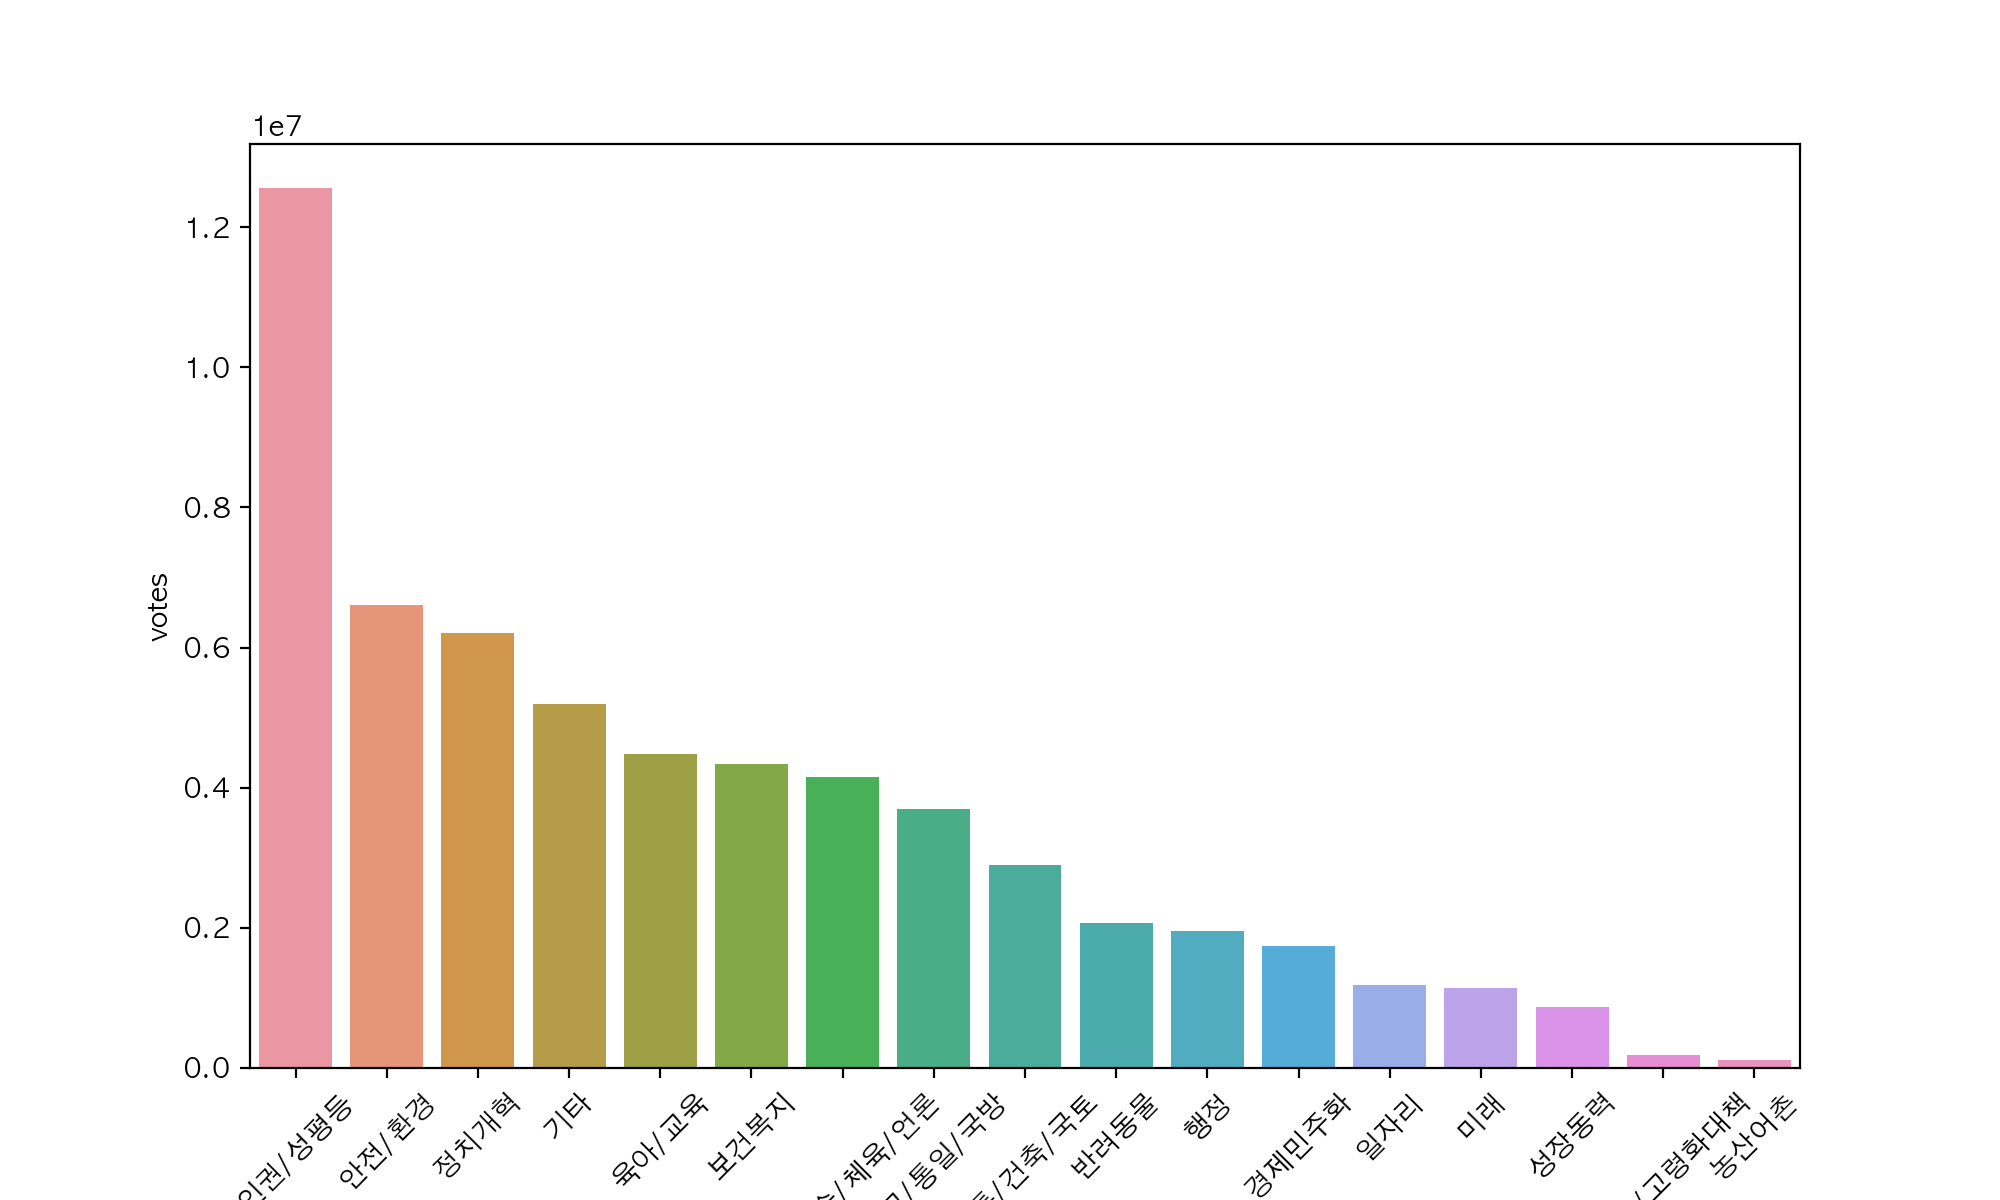

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '인권/성평등'),
  Text(1, 0, '안전/환경'),
  Text(2, 0, '정치개혁'),
  Text(3, 0, '기타'),
  Text(4, 0, '육아/교육'),
  Text(5, 0, '보건복지'),
  Text(6, 0, '문화/예술/체육/언론'),
  Text(7, 0, '외교/통일/국방'),
  Text(8, 0, '교통/건축/국토'),
  Text(9, 0, '반려동물'),
  Text(10, 0, '행정'),
  Text(11, 0, '경제민주화'),
  Text(12, 0, '일자리'),
  Text(13, 0, '미래'),
  Text(14, 0, '성장동력'),
  Text(15, 0, '저출산/고령화대책'),
  Text(16, 0, '농산어촌')])

In [200]:
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.barplot(x = 'category', y = 'votes', data = df_best)
plt.xticks(rotation=45)
#정치분야의 청원이 가장 많았지만 투표를 많이 받은 분야는 인권 분야다.

In [201]:
df['year'] = df['start'].dt.strftime('%Y')
df['month'] = df['start'].dt.strftime('%m')
df['yyyy-mm'] = df['start'].dt.strftime('%Y-%m')
when_df = df.groupby(['category', 'month',  'year'],as_index=False).votes.sum()
when_df.head(5)

,category,month,year,votes
0,경제민주화,01,2018,64984
1,경제민주화,01,2019,19892
2,경제민주화,02,2018,257136
3,경제민주화,02,2019,3891
4,경제민주화,03,2018,82824


<IPython.core.display.Javascript object>


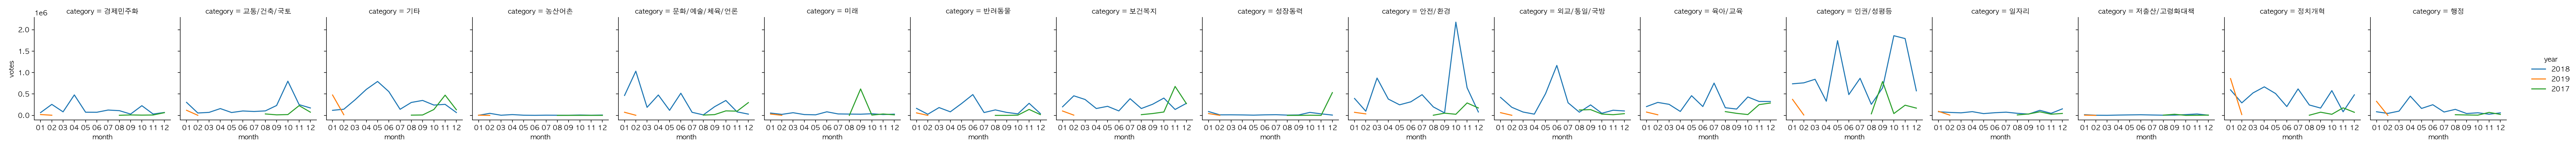

In [202]:
when_graph = sns.FacetGrid(when_df, col = 'category', hue = 'year', height = 3)
when_graph.map(sns.lineplot, 'month', 'votes')
when_graph = when_graph.add_legend()
#교통/건축/국토와 안전/환경의 경우 9~12월 기온이 낮아지는 시기에 득표수가 급증하는 것으로 보아 날씨와 관련 있어 보임.

#3_2. 답변대상 청원 중 답변율이 저조한 분야

In [203]:
df_answer= df_unique.sort_values(by='answer', \
                                              ascending=False).reset_index()
df_answer['per_diff']=df_answer['answer_diff']/df_answer['answer']
df_answer.sort_values(by='per_diff',ascending=False)
#답변대상 청원대비 답변율 낮은 분야 확인

,category,answer,answer_diff,answered,article_id,votes,per_diff
5,반려동물,4,4,0,1033826398,2066624,1.000000
2,기타,8,7,1,12225143856,5190468,0.875000
1,안전/환경,10,8,2,7529327085,6605175,0.800000
3,정치개혁,8,6,2,14675522264,6205013,0.750000
6,외교/통일/국방,4,3,1,6869752323,3696112,0.750000
7,육아/교육,3,2,1,5822857976,4475297,0.666667
0,인권/성평등,24,15,9,7963154504,12559348,0.625000
10,경제민주화,2,1,1,4529147196,1739580,0.500000
4,문화/예술/체육/언론,7,3,4,4427495546,4149796,0.428571
8,보건복지,3,1,2,6589637853,4341211,0.333333


<IPython.core.display.Javascript object>


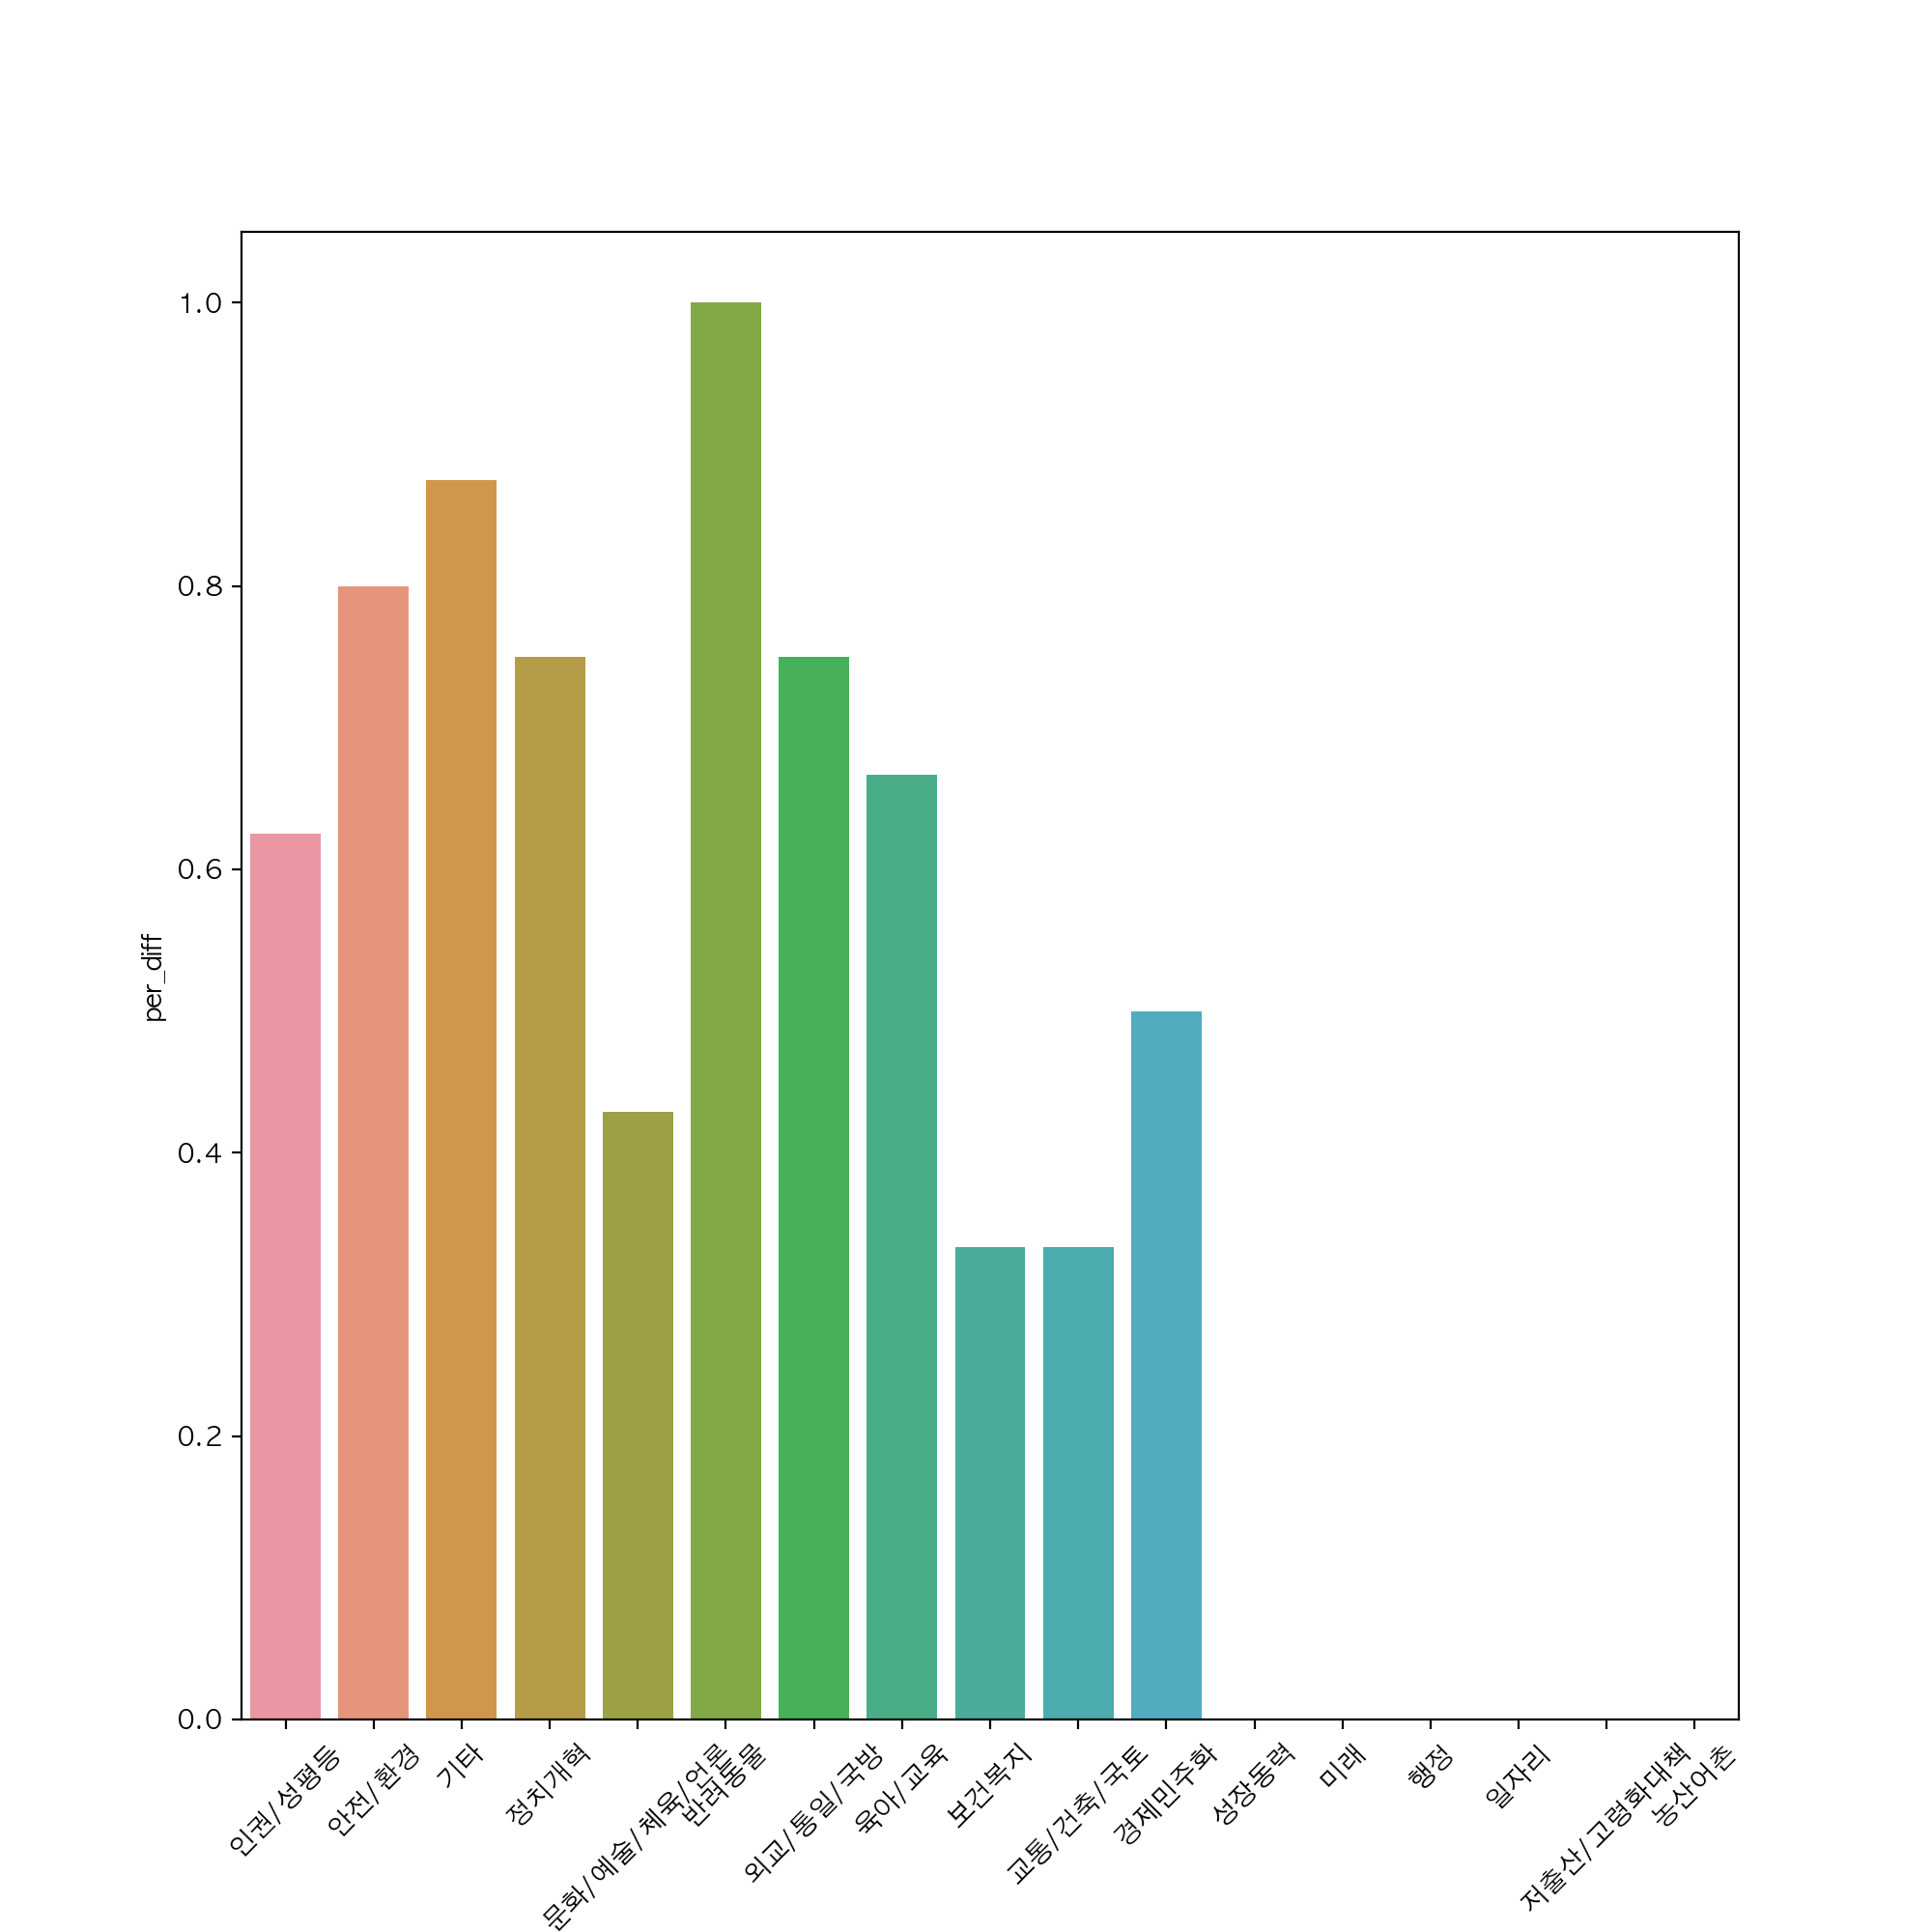

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '인권/성평등'),
  Text(1, 0, '안전/환경'),
  Text(2, 0, '기타'),
  Text(3, 0, '정치개혁'),
  Text(4, 0, '문화/예술/체육/언론'),
  Text(5, 0, '반려동물'),
  Text(6, 0, '외교/통일/국방'),
  Text(7, 0, '육아/교육'),
  Text(8, 0, '보건복지'),
  Text(9, 0, '교통/건축/국토'),
  Text(10, 0, '경제민주화'),
  Text(11, 0, '성장동력'),
  Text(12, 0, '미래'),
  Text(13, 0, '행정'),
  Text(14, 0, '일자리'),
  Text(15, 0, '저출산/고령화대책'),
  Text(16, 0, '농산어촌')])

In [204]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.barplot(x = 'category', y = 'per_diff', data = df_answer)
plt.xticks(rotation=45)
#반려동물, 기타, 안전/환경, 정치개혁, 외교 등의 순으로 답변 비율이 낮다.
#성장동력, 미래, 행정은 답변 비율이 100%이나 그 청원 수가 적음을 고려해야 한다..

#3_3. 언제 가장 득표가 많았는지

In [205]:
yyyymm_df = df.groupby(['category','yyyy-mm'], as_index=False).votes.sum()
yyyymm_df

,category,yyyy-mm,votes
0,경제민주화,2017-08,2640
1,경제민주화,2017-09,10594
2,경제민주화,2017-10,6323
3,경제민주화,2017-11,9326
4,경제민주화,2017-12,63178
...,...,...,...
318,행정,2018-10,60765
319,행정,2018-11,27508
320,행정,2018-12,58928
321,행정,2019-01,328350


<IPython.core.display.Javascript object>


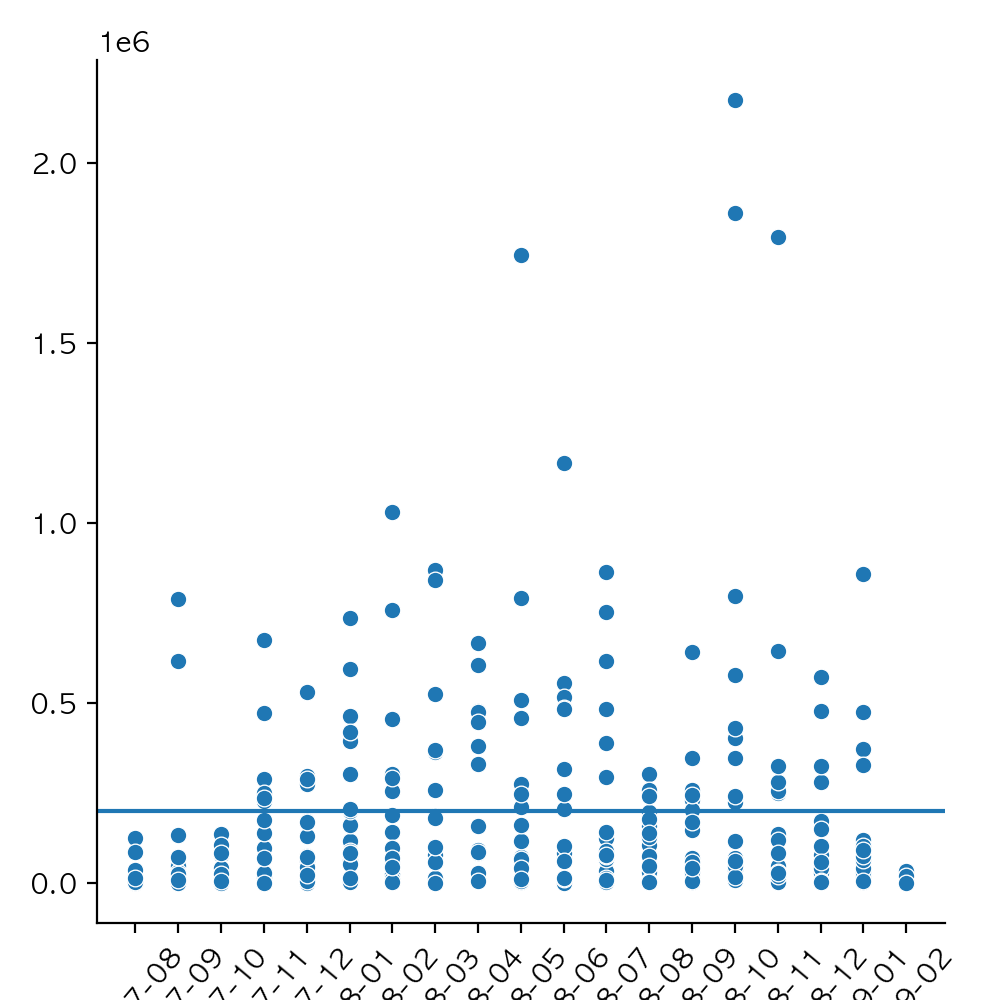

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '2017-08'),
  Text(1, 0, '2017-09'),
  Text(2, 0, '2017-10'),
  Text(3, 0, '2017-11'),
  Text(4, 0, '2017-12'),
  Text(5, 0, '2018-01'),
  Text(6, 0, '2018-02'),
  Text(7, 0, '2018-03'),
  Text(8, 0, '2018-04'),
  Text(9, 0, '2018-05'),
  Text(10, 0, '2018-06'),
  Text(11, 0, '2018-07'),
  Text(12, 0, '2018-08'),
  Text(13, 0, '2018-09'),
  Text(14, 0, '2018-10'),
  Text(15, 0, '2018-11'),
  Text(16, 0, '2018-12'),
  Text(17, 0, '2019-01'),
  Text(18, 0, '2019-02')])

In [206]:
ax = sns.relplot(x = 'yyyy-mm', y = 'votes', data = yyyymm_df)
ax.map(plt.axhline, y = 200000)
plt.xticks(rotation=50)
#2018년 10월에 청원투표가 압도적으로 많았다. 검색해보니 강서구 피시방 살인사건이 2018/10/14 발생했다.

In [207]:
#3_4. 강서구 피시방 사건 청원 살펴보기

In [208]:
import re
p = r'.*(강서구 피시방).*'
murder = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
murder.shape
#205건 정도 접수되었다.

(205, 14)

In [209]:
murder
#모두 강서구 피시방에 대한 청원이지만 카테고리가 다양하다는 것을 확인할 수 있다.

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,duration,year,month,yyyy-mm
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,1,30 days,2018,10,2018-10
313825,409240,2018-10-17,2018-11-16,0,1800,안전/환경,서울 강서구 PC방 살인사건 을 청원합니다.,2018년 10월 14일 서울 강서구 피시방 살인사건에 대한 청원입니다.\n친한 형...,0,0,30 days,2018,10,2018-10
313993,409469,2018-10-17,2018-11-16,0,142,기타,14일 강서구 피시방 아르바이트생 살인사건,이런 일이 어떻게 이렇게 허무하게 끝나려 하는지 정말 모르겠습니다. 제발 이런 일이...,0,0,30 days,2018,10,2018-10
314116,409631,2018-10-17,2018-11-16,0,102,안전/환경,서울 강서구 피시방 살인사건 피고인에 대한 강력수사를 부탁드립니다.,지난 3일전 서울 강서구의 한 피시방에서 한 알바생분의 목숨이 억울하게 사라졌습니다...,0,0,30 days,2018,10,2018-10
314135,409657,2018-10-17,2018-11-16,0,490,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자-최초 청원자입니다.,제가 처음 청원글을 올릴 때만 해도 표면적인 부분들만 알려졌을 때입니다.\n사실 사...,0,0,30 days,2018,10,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351862,457559,2018-12-01,2018-12-31,0,17,인권/성평등,저희 대한민국 국민들의 인권을 보장해주세요.,"존경하는 문재인 대통령님, 안녕하십니까?\n저는 대한민국의 교육을 받으며 한편으론 ...",0,0,30 days,2018,12,2018-12
355745,462807,2018-12-07,2019-01-06,0,1,정치개혁,강서구 피시방 살인사건 소신있게 말합니다.,"한 마디 먼저 하고 싶은 말 소신있게 하고 시작합니다.\n""법원 니들 그 따구로 쳐...",0,0,30 days,2018,12,2018-12
363547,472955,2018-12-19,2019-01-18,0,8,인권/성평등,강서구 피시방 살인사건의 김성수 동생이 폭행죄만 성립된다고 합니다,Cctv를 보나 모든 내용을 봤을때\n김성수 동생이 살인에 도움 준게 확실한데\n폭...,0,0,30 days,2018,12,2018-12
367423,478184,2018-12-25,2019-01-24,0,5,기타,왜 여자죽인살인은 얼굴공개를 잘안하나요?,진짜 이해가 안가요 재범률 높으면 공개한다면서요...강서구 피시방살인사건이랑 노래방...,0,0,30 days,2018,12,2018-12


In [210]:
cat_murder= pd.DataFrame(murder['category'].value_counts()).reset_index()
cat_murder.columns = ['category', 'counts']
cat_murder['per']=cat_murder['counts']/205
cat_murder

,category,counts,per
0,안전/환경,81,0.395122
1,기타,52,0.253659
2,인권/성평등,30,0.146341
3,정치개혁,20,0.097561
4,미래,14,0.068293
5,행정,7,0.034146
6,육아/교육,1,0.004878


<IPython.core.display.Javascript object>


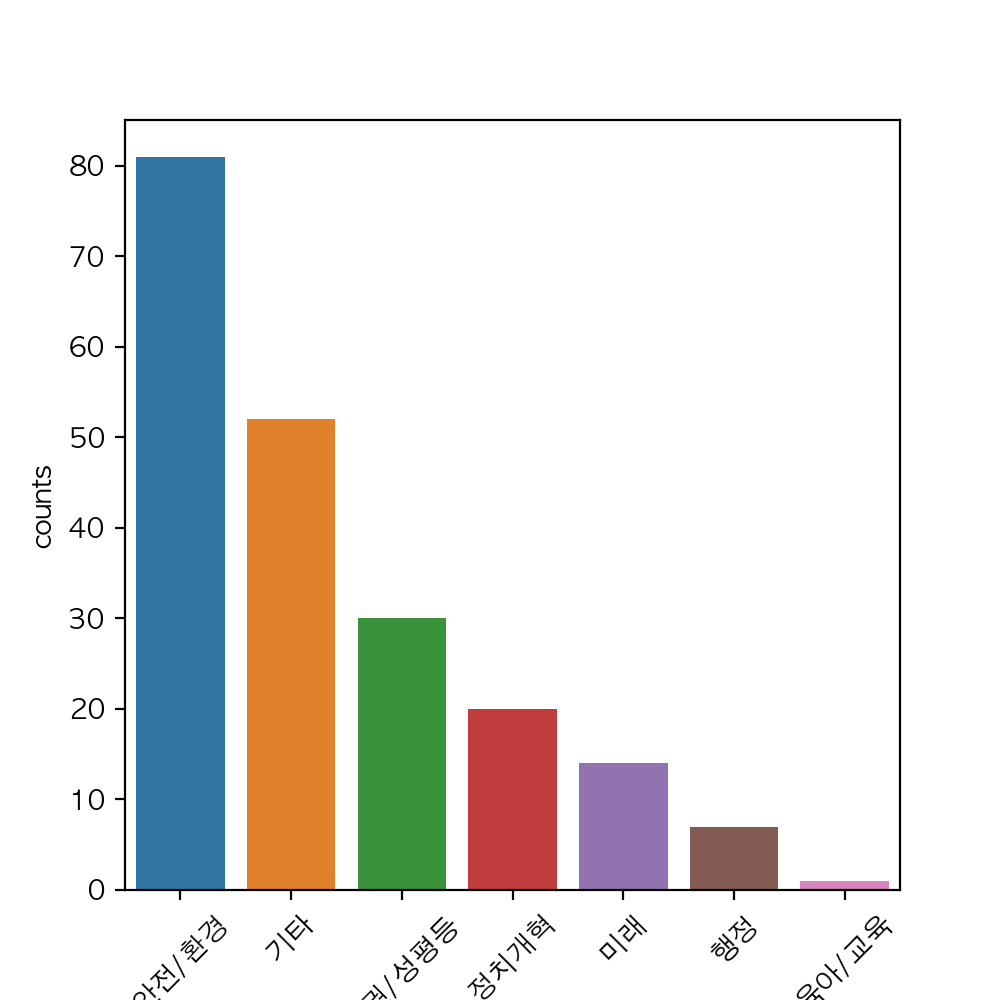

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '안전/환경'),
  Text(1, 0, '기타'),
  Text(2, 0, '인권/성평등'),
  Text(3, 0, '정치개혁'),
  Text(4, 0, '미래'),
  Text(5, 0, '행정'),
  Text(6, 0, '육아/교육')])

In [211]:
plt.figure(figsize=(5,5))
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.barplot(x = 'category', y = 'counts', data = cat_murder)
plt.xticks(rotation=45)
#사건에 대한 청원 중 약 40프로가 안전/환경에, 약 25프로가 기타에, 약 15프로가 인권/성평등으로 카테고리를 지정했다.
#미래, 행정, 육아교육에 카테고리를 지정한 청원들의 내용에도 관심을 기울여볼 수 있다.